In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
import xlrd
from matplotlib.pyplot import figure, subplot, hist, xlabel, ylim, show
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/carlahugod/Desktop/UNI/3sem/ML/smoke'

In [3]:
filename = 'smoking_driking_dataset_Ver01.csv'
data = pd.read_csv(filename)

raw_data = data.values

attri = np.asarray(data.columns)

print("These are the features", attri)

These are the features ['sex' 'age' 'height' 'weight' 'waistline' 'sight_left' 'sight_right'
 'hear_left' 'hear_right' 'SBP' 'DBP' 'BLDS' 'tot_chole' 'HDL_chole'
 'LDL_chole' 'triglyceride' 'hemoglobin' 'urine_protein'
 'serum_creatinine' 'SGOT_AST' 'SGOT_ALT' 'gamma_GTP' 'SMK_stat_type_cd'
 'DRK_YN']


In [4]:
# Extract class names to python list,
# then encode with integers (dict)

classLabels = raw_data[:, 0]
classNames = np.unique(classLabels)
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy matrix and transpose
y = np.array([classDict[value] for value in classLabels])

# Preallocate memory, then extract data to matrix X
X = raw_data[:, 1:]

for i in range(0,len(attri)-1):
    X[:,i] = np.array(data.iloc[:,i]).T

# Compute values of N, M and C.
N = len(y)
M = len(attri)
C = len(classNames)
print(N,M,C)

991346 24 2


In [99]:
raw_data[:,3]

array([170, 180, 165, ..., 155, 175, 160], dtype=object)

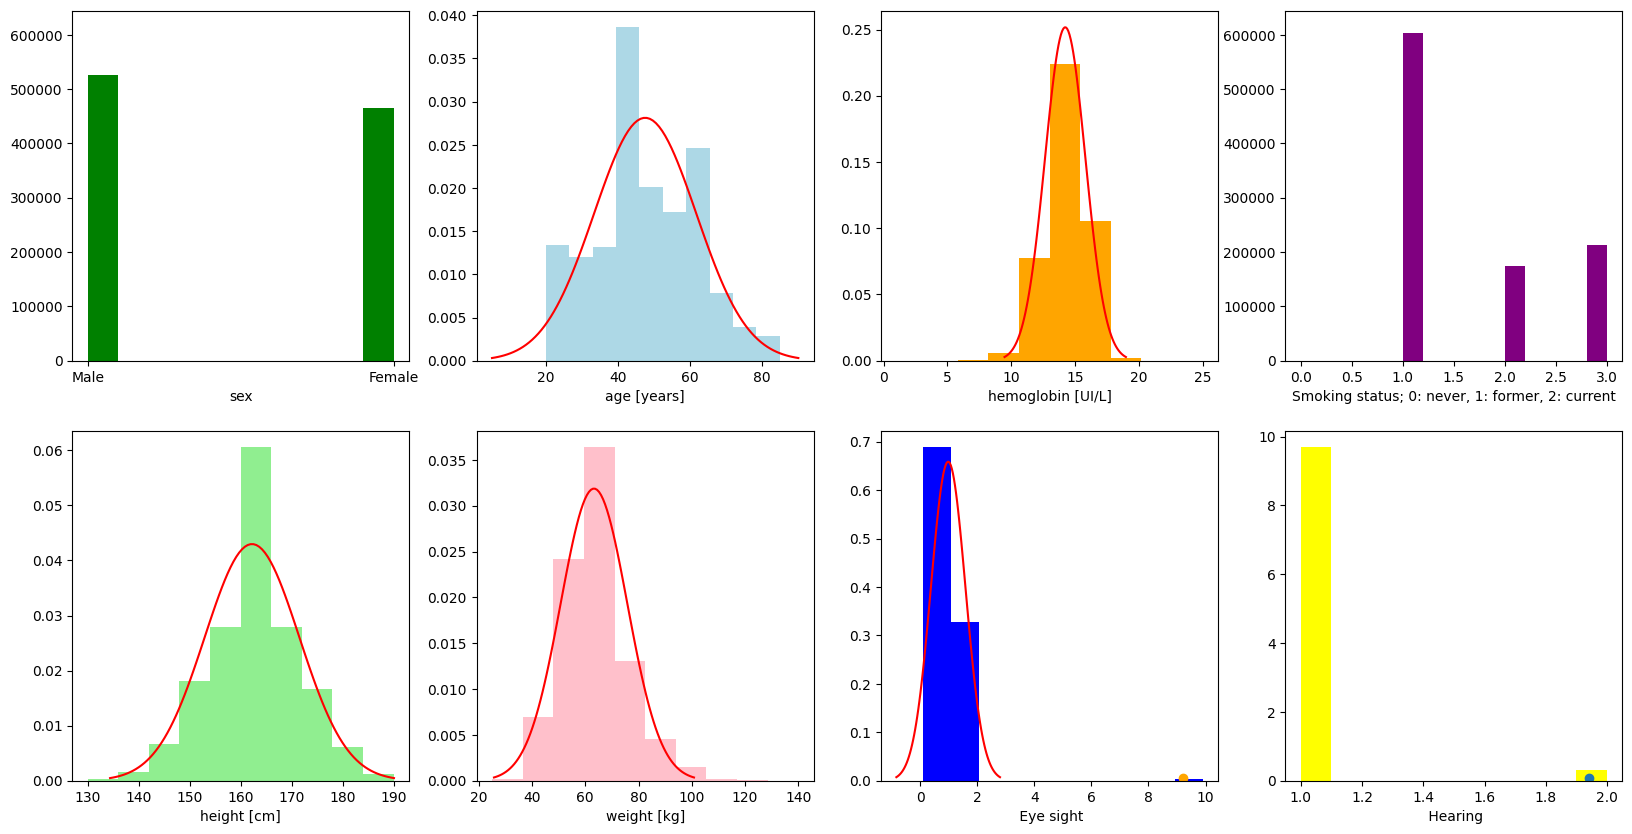

In [135]:

# If the data here, fx height is normal dist. then chances are that it is a representative data set.

# plot 2 age
figure(figsize=(20,10))

mu1= np.mean(raw_data[:, 2])
sigma1 = np.std(raw_data[:, 2])

x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
plt.subplot(2,4,2)
plt.hist(raw_data[:, 2], density=True, color='lightblue')
plt.xlabel(attri[1] + ' [years]')
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1), color='red')


# plot 1 sex
plt.subplot(2,4,1)
u1 = np.floor(np.sqrt(M)); v1 = np.ceil(float(M)/u1)
plt.plot(1, int(v1), 1)
hist(X[:, 0], color=('green'))
xlabel(attri[0])
ylim(0, N/2*1.3)


# plot 3: hemoglobin
mu2 = np.mean(raw_data[:,17])
sigma2 = np.std(raw_data[:,17])
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.subplot(2,4,3)
plt.hist(raw_data[:, 17], density=True, color='orange')
plt.xlabel(attri[16] + ' [UI/L]')
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2), color='red')


# plot 4: smoking
plt.subplot(2,4,4)
u2 = np.floor(np.sqrt(M)); v2 = np.ceil(float(M)/u2)
plt.plot(1, int(v2), 1)
hist(X[:, -1], color=('purple'))
xlabel('Smoking status; 0: never, 1: former, 2: current')
ylim(0, N/2*1.3)


# plot 5: height raw_data[:,3]
mu3 = np.mean(raw_data[:,3])
sigma3 = np.std(raw_data[:,3])
x3 = np.linspace(mu3 - 3*sigma3, mu3 + 3*sigma3, 100)
plt.subplot(2,4,5)
plt.hist(raw_data[:, 3], density=True, color='lightgreen')
plt.xlabel(attri[2] + ' [cm]')
plt.plot(x3, stats.norm.pdf(x3, mu3, sigma3), color='red')


# plot 6: weight raw_data[:,4]
mu4 = np.mean(raw_data[:,4])
sigma4 = np.std(raw_data[:,4])
x4 = np.linspace(mu4 - 3*sigma4, mu4 + 3*sigma4, 100)
plt.subplot(2,4,6)
plt.hist(raw_data[:, 4], density=True, color='pink')
plt.xlabel(attri[3] + ' [kg]')
plt.plot(x4, stats.norm.pdf(x4, mu4, sigma4), color='red')

# plot 7, sight raw_data[:,6] left raw_data[:,7] right. Here I have to add two normal distribution. OBS: blind is the outlier
mu51 = np.mean(raw_data[:,6])
sigma51= np.std(raw_data[:,6])
mu52 = np.mean(raw_data[:,7])
sigma52= np.std(raw_data[:,7])
mu5 = (mu51 + mu52)/2
sigma5 = (sigma51 + sigma52)/2
x5 = np.linspace(mu5 - 3*sigma5, mu5 + 3*sigma5, 100)
plt.subplot(2,4,7)
plt.hist(raw_data[:, 6], density=True, color='blue')
plt.xlabel(' Eye sight')
plt.plot(x5, stats.norm.pdf(x5, mu5, sigma5), color='red')
plt.scatter(9.2,0.005, color='orange')


# plot 8: hearing raw_data[:,8] left raw_data[:,9] right 
plt.subplot(2,4,8)
plt.hist(raw_data[:, 8], density=True, color='yellow')
plt.xlabel(' Hearing')
plt.scatter(1.94,0.08)
